# Data Engineering and Exploration of Medical Protests using GDELT
### Developed by Abhinav Sharma

### This notebook covers the Feature Engineering and Data Transformation part of the project. We will be creating a Target Variable that will enable us to classify an event falling under the Event Root Code 10,11,12 and 13 as either a protest(Event Root Code=14) causing event or a non-protest event. We will also be identifying significant features and generating a file that will be pushed into MongoDB database for anyone who wishes to use the data to predict future protests.

#### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import collections
import warnings
warnings.filterwarnings('ignore')

#### Read Data File

In [2]:
df=pd.read_csv('bq-results-20220806-165749-1659805173095.csv') #df stores data from the file
df.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,690316373,20170917,201709,2017,2017.7041,HLH,HOSPITAL,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170917104500,http://www.granadahoy.com/granada/hospitales-a...
1,690318393,20170917,201709,2017,2017.7041,CVL,POPULATION,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170917110000,http://www.source-7.com/news/1093691.html
2,690318685,20170917,201709,2017,2017.7041,HLH,HOSPITAL,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170917110000,http://abola.pt/Mundos/Noticias/Ver/692439
3,690318687,20170917,201709,2017,2017.7041,HLH,DOCTOR,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170917110000,http://jagbani.punjabkesari.in/punjab/news/on-...
4,690319757,20170917,201709,2017,2017.7041,GBR,WALES,GBR,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170917113000,https://blueandgreentomorrow.com/features/help...


In [3]:
#print unique values in each column
for col in df:
    print(col,":",df[col].unique())
#We can see from running the above that there is only 1 value '3' present in QuadClass. Therefore we will drop the column as its a constant feature and will not contribute in future predictions.

GLOBALEVENTID : [690316373 690318393 690318685 ... 935500689 935610356 935772419]
SQLDATE : [20170917 20170918 20170916 ... 20171216 20171217 20210601]
MonthYear : [201709 201708 201609 201711 201608 201707 201702 201701 201602 201703
 201603 202208 202202 201611 201612 201610 201511 202207 202102 202111
 202110 202011 201509 202201 201706 201606 201705 201508 201607 201512
 202006 201906 202005 201805 201510 201801 201909 201908 201804 201704
 201803 201802 202007 201907 201812 201811 201712 201601 202101 202001
 202012 201912 202010 202109 201605 201901 201810 201809 201507 201604
 201506 201505 201504 201503 201502 202112 201808 202205 202105 202204
 201501 202002 201902 202206 202106 201807 201911 201910 201903 201806
 201710 202004 201905 202009 202008 202108 202104 202203 201904 202107
 202003 202103]
Year : [2017 2016 2022 2015 2021 2020 2019 2018]
FractionDate : [2017.7041 2017.7068 2017.7014 ... 2018.4932 2017.9479 2017.9507]
Actor1Code : ['HLH' 'CVL' 'GBR' ... 'SETHLH' 'ESPGO

Actor1Geo_CountryCode : [nan 'AS' 'BO' 'CH' 'US' 'EN' 'GM' 'HR' 'IT' 'MX' 'NL' 'UK' 'MO' 'CA' 'EC'
 'RO' 'FR' 'IN' 'TZ' 'ID' 'IR' 'CI' 'EG' 'YM' 'IS' 'JA' 'JO' 'AR' 'BE'
 'GH' 'MY' 'AF' 'RS' 'BN' 'ES' 'GA' 'GT' 'HK' 'NO' 'PK' 'PO' 'RI' 'SP'
 'SU' 'SW' 'TD' 'TU' 'UP' 'ZI' 'BG' 'BR' 'CE' 'DR' 'ER' 'GR' 'HO' 'KE'
 'KS' 'LG' 'LO' 'NI' 'PL' 'SF' 'SG' 'SY' 'UG' 'VE' 'BL' 'EI' 'FJ' 'GI'
 'IC' 'KG' 'NP' 'PM' 'QA' 'KN' 'SZ' 'UZ' 'CO' 'TS' 'MI' 'KZ' 'MP' 'CG'
 'BB' 'JE' 'JM' 'LE' 'RE' 'GQ' 'NZ' 'HU' 'PE' 'LH' 'NU' 'AJ' 'HA' 'NR'
 'BA' 'UY' 'BH' 'SA' 'BK' 'WE' 'VM' 'DA' 'BM' 'FI' 'BU' 'LU' 'EZ' 'CS'
 'AM' 'CU' 'CY' 'MT' 'MJ' 'TK' 'TW' 'SI' 'IZ' 'RB' 'AU' 'MK' 'PA' 'CJ'
 'AG' 'SL' 'RP' 'MG' 'MU' 'AE' 'DO' 'WA' 'CW' 'LI' 'SO' 'AL' 'MD' 'ML'
 'TO' 'OS' 'LT' 'AN' 'MH' 'GK' 'GG' 'NG' 'MA' 'GB' 'NS' 'TH' 'SB' 'GP'
 'RQ' 'BF' 'MN' 'SN' 'GL' 'AO' 'BX' 'BC' 'LA' 'BY' 'DJ' 'KU' 'UV' 'IV'
 'WS' 'MB' 'LY' 'CM' 'ET' 'KV' 'TI' 'TX' 'CB' 'CF' 'PP' 'YI' 'VQ' 'BD'
 'GJ' 'CD' 'OD' 'BT' 'GY' 'ST' 'GZ' 'VC' 'ZA' 'MC

In [4]:
#dropping QuadClass column
df=df.drop(['QuadClass'], axis=1)
df.shape

(923815, 60)

In [5]:
#printing column datatype and count of Null/Non Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923815 entries, 0 to 923814
Data columns (total 60 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   GLOBALEVENTID          923815 non-null  int64  
 1   SQLDATE                923815 non-null  int64  
 2   MonthYear              923815 non-null  int64  
 3   Year                   923815 non-null  int64  
 4   FractionDate           923815 non-null  float64
 5   Actor1Code             827129 non-null  object 
 6   Actor1Name             827129 non-null  object 
 7   Actor1CountryCode      153693 non-null  object 
 8   Actor1KnownGroupCode   1813 non-null    object 
 9   Actor1EthnicCode       1364 non-null    object 
 10  Actor1Religion1Code    2080 non-null    object 
 11  Actor1Religion2Code    645 non-null     object 
 12  Actor1Type1Code        691251 non-null  object 
 13  Actor1Type2Code        14451 non-null   object 
 14  Actor1Type3Code        245 non-null 

In [6]:
#sort data based on MonthYear, ActionGeo_Lat and ActionGeo_Long
sorted_df = df.sort_values(by=['MonthYear','ActionGeo_Lat','ActionGeo_Long'], ascending=True)

In [7]:
sorted_df.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
182489,412507681,20150127,201501,2015,2015.0740,BEL,GENT,BEL,NaN,NaN,...,4,"Melbourne, Victoria, Australia",AS,AS07,5430,-37.81670,144.9670,-1586844,20150226100000,http://www.dailymail.co.uk/news/article-297001...
126971,413131130,20150129,201501,2015,2015.0795,NaN,NaN,NaN,NaN,NaN,...,4,"Kwazulu, Eastern Cape, South Africa",SF,SF05,77353,-31.28950,29.4551,-1250484,20150228131500,http://www.sowetanlive.co.za/entertainment/201...
470230,500452942,20150108,201501,2015,2015.0219,HLH,HOSPITAL,NaN,NaN,NaN,...,1,Mauritius,MP,MP,NaN,-20.28330,57.5500,MP,20160108113000,http://www.hercole.it/index.php?option=com_con...
520005,500452945,20150108,201501,2015,2015.0219,MUS,MAURITIUS,MUS,NaN,NaN,...,1,Mauritius,MP,MP,NaN,-20.28330,57.5500,MP,20160108113000,http://www.hercole.it/index.php?option=com_con...
174132,411630798,20150124,201501,2015,2015.0658,HLH,HOSPITAL,NaN,NaN,NaN,...,4,"Wabag, Enga, Papua New Guinea",PP,PP19,18585,-5.47808,143.7020,-2202745,20150223161500,http://www.emtv.com.pg/article.aspx?slug=Tok-P...


In [8]:
%%time
#group data based on MonthYear, ActionGeo_Lat and ActionGeo_Long
group_df = sorted_df.groupby(['MonthYear','ActionGeo_Lat','ActionGeo_Long'],as_index=False).agg(list)

Wall time: 8min 34s


In [9]:
#dimensions of grouped data
group_df.shape

(162176, 60)

In [10]:
#print grouped dataframe
group_df

,MonthYear,ActionGeo_Lat,ActionGeo_Long,GLOBALEVENTID,SQLDATE,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,...,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,201501,-37.81670,144.96700,[412507681],[20150127],[2015],[2015.0739999999998],[BEL],[GENT],[BEL],...,[144.967],[-1586844],[4],"[Melbourne, Victoria, Australia]",[AS],[AS07],[5430],[-1586844],[20150226100000],[http://www.dailymail.co.uk/news/article-29700...
1,201501,-31.28950,29.45510,[413131130],[20150129],[2015],[2015.0795],[nan],[nan],[nan],...,[29.4551],[-1250484],[4],"[Kwazulu, Eastern Cape, South Africa]",[SF],[SF05],[77353],[-1250484],[20150228131500],[http://www.sowetanlive.co.za/entertainment/20...
2,201501,-20.28330,57.55000,"[500452942, 500452945]","[20150108, 20150108]","[2015, 2015]","[2015.0219, 2015.0219]","[HLH, MUS]","[HOSPITAL, MAURITIUS]","[nan, MUS]",...,"[nan, 57.55]","[nan, MP]","[1, 1]","[Mauritius, Mauritius]","[MP, MP]","[MP, MP]","[nan, nan]","[MP, MP]","[20160108113000, 20160108113000]",[http://www.hercole.it/index.php?option=com_co...
3,201501,-5.47808,143.70200,"[411630798, 411630803]","[20150124, 20150124]","[2015, 2015]","[2015.0658, 2015.0658]","[HLH, PNG]","[HOSPITAL, PAPUA NEW GUINEA]","[nan, PNG]",...,"[nan, 143.702]","[nan, -2202745]","[4, 4]","[Wabag, Enga, Papua New Guinea, Wabag, Enga, P...","[PP, PP]","[PP19, PP19]","[18585, 18585]","[-2202745, -2202745]","[20150223161500, 20150223161500]",[http://www.emtv.com.pg/article.aspx?slug=Tok-...
4,201501,7.76667,4.56667,"[500670485, 501180754]","[20150109, 20150111]","[2015, 2015]","[2015.0247, 2015.0301]","[HLH, HLH]","[DOCTOR, DOCTOR]","[nan, nan]",...,"[nan, nan]","[nan, nan]","[4, 4]","[Osogbo, Osun, Nigeria, Osogbo, Osun, Nigeria]","[NI, NI]","[NI42, NI42]","[23012, 23012]","[-2024228, -2024228]","[20160109051500, 20160111130000]",[http://www.ngrguardiannews.com/2016/01/consul...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162171,202208,60.00000,-96.00000,"[1057432444, 1057049315, 1057218771, 105688570...","[20220806, 20220803, 20220804, 20220802, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.5836, 2022.5863, 2022.5808, 2...","[HLH, HLH, HLH, HLH, BUS, HLH, IRQ, CAN, HLH]","[DOCTOR, HOSPITAL, DOCTOR, DOCTOR, COMPANIES, ...","[nan, nan, nan, nan, nan, nan, IRQ, CAN, nan]",...,"[nan, nan, nan, 135.0, -96.0, -96.0, -96.0, -9...","[nan, nan, nan, AS, CA, CA, CA, CA, CA]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[Canada, Canada, Canada, Canada, Canada, Canad...","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[20220806023000, 20220803211500, 2022080419300...",[https://www.gazetadopovo.com.br/vida-e-cidada...
162172,202208,60.00000,100.00000,"[1057492161, 1057442956, 1057357288, 105737040...","[20220806, 20220806, 20220805, 20220805, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.5918, 2022.589, 2022.589, 202...","[HLH, HLH, HLH, nan, nan, HLH, HLH, HLH, HLH, ...","[DOCTOR, DOCTOR, DOCTOR, nan, nan, HOSPITAL, D...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",...,"[100.0, nan, nan, 100.0, 100.0, nan, nan, nan,...","[RS, nan, nan, RS, RS, nan, nan, nan, nan, nan...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Russia, Russia, Russia, Russia, Russia, Russi...","[RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, R...","[RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, R...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, R...","[20220806151500, 20220806050000, 2022080515300...",[https://www.critic.co.nz/news/article/10294/p...
162173,202208,61.38500,-152.26800,"[1056718708, 1056718707]","[20220802, 20220802]","[2022, 2022]","[2022.5808, 2022.5808]","[HLH, HLH]","[HOSPITAL, HOSPITAL]","[nan,

In [11]:
#print list of event root codes of grouped data
group_df['EventRootCode']

0                                                      [11]
1                                                      [13]
2                                                  [11, 11]
3                                                  [14, 14]
4                                                  [10, 10]
                                ...                        
162171                 [11, 13, 12, 13, 11, 12, 13, 12, 12]
162172    [13, 12, 11, 12, 11, 11, 11, 13, 11, 12, 11, 1...
162173                                             [13, 13]
162174                                             [12, 10]
162175                                             [13, 11]
Name: EventRootCode, Length: 162176, dtype: object

In [12]:
%%time
# Apply Target generation logic. 
# If event root code list present in groped data contains 14(protest), 
# all the features in that list will be flagged as 1, else 0. 
# This signifies whether an event will lead to a protest or not.
flag_list=[]
for p_list in group_df['EventRootCode']:
    if 14 in p_list:
        flag_list.append([1]*len(p_list))
    else:
        flag_list.append([0]*len(p_list))

Wall time: 82.2 ms


In [13]:
#print flag list
flag_list

[[0],
 [0],
 [0, 0],
 [1, 1],
 [0, 0],
 [1, 1, 1, 1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0, 0],
 [0, 0],
 [1],
 [0, 0],
 [0],
 [0],
 [0, 0, 0, 0, 0, 0],
 [0],
 [0, 0],
 [0],
 [0, 0],
 [0, 0],
 [0],
 [0],
 [0, 0],
 [0],
 [0],
 [0, 0, 0],
 [0, 0],
 [1, 1],
 [0],
 [0],
 [0],
 [0],
 [0, 0, 0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0, 0],
 [0],
 [0, 0, 0],
 [0, 0],
 [0],
 [0],
 [0],
 [0],
 [0, 0],
 [0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0],
 [0],
 [0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0],
 [1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0],
 [0],
 [1],
 [0, 0, 0, 0, 0],
 [1],
 [1],
 [0],
 [0],
 [0, 0],
 [0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0],
 [1, 1, 1, 1, 1, 1],
 [0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0],
 [1, 1, 1, 1],
 [0],
 [0, 0, 0, 0],
 [0],
 [0, 0],
 [0],
 [0, 0],
 [0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0],
 [0],
 [0, 0, 0, 0, 0],
 [0],
 [0, 0],
 [0, 0],
 [0,

In [14]:
len(flag_list)

162176

In [15]:
#assign flag_list as a new column flag in grouped dataframe
group_df['flag'] = flag_list

In [16]:
group_df

,MonthYear,ActionGeo_Lat,ActionGeo_Long,GLOBALEVENTID,SQLDATE,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_FeatureID,DATEADDED,SOURCEURL,flag
0,201501,-37.81670,144.96700,[412507681],[20150127],[2015],[2015.0739999999998],[BEL],[GENT],[BEL],...,[-1586844],[4],"[Melbourne, Victoria, Australia]",[AS],[AS07],[5430],[-1586844],[20150226100000],[http://www.dailymail.co.uk/news/article-29700...,[0]
1,201501,-31.28950,29.45510,[413131130],[20150129],[2015],[2015.0795],[nan],[nan],[nan],...,[-1250484],[4],"[Kwazulu, Eastern Cape, South Africa]",[SF],[SF05],[77353],[-1250484],[20150228131500],[http://www.sowetanlive.co.za/entertainment/20...,[0]
2,201501,-20.28330,57.55000,"[500452942, 500452945]","[20150108, 20150108]","[2015, 2015]","[2015.0219, 2015.0219]","[HLH, MUS]","[HOSPITAL, MAURITIUS]","[nan, MUS]",...,"[nan, MP]","[1, 1]","[Mauritius, Mauritius]","[MP, MP]","[MP, MP]","[nan, nan]","[MP, MP]","[20160108113000, 20160108113000]",[http://www.hercole.it/index.php?option=com_co...,"[0, 0]"
3,201501,-5.47808,143.70200,"[411630798, 411630803]","[20150124, 20150124]","[2015, 2015]","[2015.0658, 2015.0658]","[HLH, PNG]","[HOSPITAL, PAPUA NEW GUINEA]","[nan, PNG]",...,"[nan, -2202745]","[4, 4]","[Wabag, Enga, Papua New Guinea, Wabag, Enga, P...","[PP, PP]","[PP19, PP19]","[18585, 18585]","[-2202745, -2202745]","[20150223161500, 20150223161500]",[http://www.emtv.com.pg/article.aspx?slug=Tok-...,"[1, 1]"
4,201501,7.76667,4.56667,"[500670485, 501180754]","[20150109, 20150111]","[2015, 2015]","[2015.0247, 2015.0301]","[HLH, HLH]","[DOCTOR, DOCTOR]","[nan, nan]",...,"[nan, nan]","[4, 4]","[Osogbo, Osun, Nigeria, Osogbo, Osun, Nigeria]","[NI, NI]","[NI42, NI42]","[23012, 23012]","[-2024228, -2024228]","[20160109051500, 20160111130000]",[http://www.ngrguardiannews.com/2016/01/consul...,"[0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162171,202208,60.00000,-96.00000,"[1057432444, 1057049315, 1057218771, 105688570...","[20220806, 20220803, 20220804, 20220802, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.5836, 2022.5863, 2022.5808, 2...","[HLH, HLH, HLH, HLH, BUS, HLH, IRQ, CAN, HLH]","[DOCTOR, HOSPITAL, DOCTOR, DOCTOR, COMPANIES, ...","[nan, nan, nan, nan, nan, nan, IRQ, CAN, nan]",...,"[nan, nan, nan, AS, CA, CA, CA, CA, CA]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[Canada, Canada, Canada, Canada, Canada, Canad...","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[20220806023000, 20220803211500, 2022080419300...",[https://www.gazetadopovo.com.br/vida-e-cidada...,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
162172,202208,60.00000,100.00000,"[1057492161, 1057442956, 1057357288, 105737040...","[20220806, 20220806, 20220805, 20220805, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.5918, 2022.589, 2022.589, 202...","[HLH, HLH, HLH, nan, nan, HLH, HLH, HLH, HLH, ...","[DOCTOR, DOCTOR, DOCTOR, nan, nan, HOSPITAL, D...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",...,"[RS, nan, nan, RS, RS, nan, nan, nan, nan, nan...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Russia, Russia, Russia, Russia, Russia, Russi...","[RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, R...","[RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, R...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, RS, R...","[20220806151500, 20220806050000, 2022080515300...",[https://www.critic.co.nz/news/article/10294/p...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
162173,202208,61.38500,-152.26800,"[1056718708, 1056718707]","[20220802, 20220802]","[2022, 2022]","[2022.5808, 2022.5808]","[HLH, HLH]","[HOSPITAL, HOSPITAL]","[nan, nan]",...,"[nan, nan]","[2, 2]","[Alaska, United States, Alas

In [17]:
#print count of each unique value in flag column
group_df['flag'].value_counts()

[0]                                                                                                                                                                                                                                                                                                                  73294
[0, 0]                                                                                                                                                                                                                                                                                                               28634
[0, 0, 0]                                                                                                                                                                                                                                                                                                            10580
[0, 0, 0, 0]                                           

In [18]:
#generate a counter column that is a sum of values present in the list of flag column for each row
group_df['counter']=group_df['flag'].apply(sum)

In [19]:
#filter all rows where counter is not 0. This signifies that the row has flag as 1
unrest_df = group_df[group_df['counter'] > 0]
unrest_df

,MonthYear,ActionGeo_Lat,ActionGeo_Long,GLOBALEVENTID,SQLDATE,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_FeatureID,DATEADDED,SOURCEURL,flag,counter
3,201501,-5.47808,143.7020,"[411630798, 411630803]","[20150124, 20150124]","[2015, 2015]","[2015.0658, 2015.0658]","[HLH, PNG]","[HOSPITAL, PAPUA NEW GUINEA]","[nan, PNG]",...,"[4, 4]","[Wabag, Enga, Papua New Guinea, Wabag, Enga, P...","[PP, PP]","[PP19, PP19]","[18585, 18585]","[-2202745, -2202745]","[20150223161500, 20150223161500]",[http://www.emtv.com.pg/article.aspx?slug=Tok-...,"[1, 1]",2
5,201501,13.32670,24.8534,"[503311652, 503311653, 503311655, 503311654]","[20150118, 20150118, 20150118, 20150118]","[2015, 2015, 2015, 2015]","[2015.0493, 2015.0493, 2015.0493, 2015.0493]","[HLH, HLH, HLH, HLH]","[DOCTOR, DOCTOR, DOCTOR, DOCTOR]","[nan, nan, nan, nan]",...,"[4, 4, 4, 4]","[Dabanga, Shamal Darfur, Sudan, Dabanga, Shama...","[SU, SU, SU, SU]","[SU55, SU55, SU55, SU55]","[37080, 37080, 37080, 37080]","[11081854, 11081854, 11081854, 11081854]","[20160118134500, 20160118134500, 2016011813450...",[http://allafrica.com/stories/201601181388.htm...,"[1, 1, 1, 1]",4
13,201501,28.66670,77.2167,[505540998],[20150125],[2015],[2015.0685],[HLH],[DOCTOR],[nan],...,[4],"[Delhi, Delhi, India]",[IN],[IN07],[17911],[-2094230],[20160125214500],[http://indianexpress.com/article/cities/delhi...,[1],1
30,201501,41.34370,-86.3097,"[412013815, 412013819]","[20150125, 20150125]","[2015, 2015]","[2015.0685, 2015.0685]","[nan, HLH]","[nan, HEALTH FACILITY]","[nan, nan]",...,"[3, 3]","[Marshall County, Indiana, United States, Mars...","[US, US]","[USIN, USIN]","[nan, nan]","[450372, 450372]","[20150224210000, 20150224210000]","[http://www.wkvi.com/tag/investigation/, http:...","[1, 1]",2
61,201502,-35.35910,150.4720,[412107225],[20150225],[2015],[2015.1507],[EDU],[SCHOOL],[nan],...,[4],"[Ulladulla, New South Wales, Australia]",[AS],[AS02],[5081],[-1606414],[20150225033000],[http://www.ulladullatimes.com.au/story/290653...,[1],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162124,202208,49.98080,36.2527,"[1056898807, 1057224566, 1057216944]","[20220803, 20220804, 20220804]","[2022, 2022, 2022]","[2022.5836, 2022.5863, 2022.5863]","[HLH, UKRUAF, OPP]","[HOSPITAL, UKRAINE, HUMAN RIGHTS ACTIVIST]","[nan, UKR, nan]",...,"[4, 4, 4]","[Kharkiv, Kharkivs'ka Oblast', Ukraine, Kharki...","[UP, UP, UP]","[UP07, UP07, UP07]","[25036, 25036, 25036]","[-1041320, -1041320, -1041320]","[20220803010000, 20220804201500, 20220804191500]",[https://ria.ru/20220803/moshenniki-1806816207...,"[1, 1, 1]",3
162133,202208,51.50000,10.5000,"[1056578009, 1056633594, 1056944063, 105720097...","[20220801, 20220801, 20220803, 20220804, 20220...","[2022, 2022, 2022, 2022, 2022]","[2022.5781, 2022.5781, 2022.5836, 2022.5863, 2...","[HLH, HLH, HLH, HLH, HLH]","[HOSPITAL, NURSE, DOCTOR, DOCTOR, DOCTOR]","[nan, nan, nan, nan, nan]",...,"[1, 1, 1, 1, 1]","[Germany, Germany, Germany, Germany, Germany]","[GM, GM, GM, GM, GM]","[GM, GM, GM, GM, GM]","[nan, nan, nan, nan, nan]","[GM, GM, GM, GM, GM]","[20220801040000, 20220801131500, 2022080308150...",[https://www.tagesschau.de/ausland/europa/kell...,"[1, 1, 1, 1, 1]",5
162154,202208,54.00000,-4.0000,"[1057497872, 1057491090, 1057499233, 105740248...","[20220806, 20220806, 20220806, 20220805, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.5918, 2022.5918, 2022.589, 20...","[nan, MOS, GBR, HLH, HLH, HLH, HLH, HLH, HLH, ...","[nan, ISLAMIC, UNITED KINGDOM, DOCTOR, DOCTOR,...","[nan, nan, GBR, nan, nan, nan, nan, nan, nan, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[United Kingdom, United Kingdom, United Kingdo...","[UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, U...","[UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, U...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[UK, UK, UK, 

In [20]:
#filter all rows where counter is 0. This signifies that the row has flag as 0
non_unrest_df = group_df[group_df['counter']==0]
non_unrest_df

,MonthYear,ActionGeo_Lat,ActionGeo_Long,GLOBALEVENTID,SQLDATE,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_FeatureID,DATEADDED,SOURCEURL,flag,counter
0,201501,-37.81670,144.96700,[412507681],[20150127],[2015],[2015.0739999999998],[BEL],[GENT],[BEL],...,[4],"[Melbourne, Victoria, Australia]",[AS],[AS07],[5430],[-1586844],[20150226100000],[http://www.dailymail.co.uk/news/article-29700...,[0],0
1,201501,-31.28950,29.45510,[413131130],[20150129],[2015],[2015.0795],[nan],[nan],[nan],...,[4],"[Kwazulu, Eastern Cape, South Africa]",[SF],[SF05],[77353],[-1250484],[20150228131500],[http://www.sowetanlive.co.za/entertainment/20...,[0],0
2,201501,-20.28330,57.55000,"[500452942, 500452945]","[20150108, 20150108]","[2015, 2015]","[2015.0219, 2015.0219]","[HLH, MUS]","[HOSPITAL, MAURITIUS]","[nan, MUS]",...,"[1, 1]","[Mauritius, Mauritius]","[MP, MP]","[MP, MP]","[nan, nan]","[MP, MP]","[20160108113000, 20160108113000]",[http://www.hercole.it/index.php?option=com_co...,"[0, 0]",0
4,201501,7.76667,4.56667,"[500670485, 501180754]","[20150109, 20150111]","[2015, 2015]","[2015.0247, 2015.0301]","[HLH, HLH]","[DOCTOR, DOCTOR]","[nan, nan]",...,"[4, 4]","[Osogbo, Osun, Nigeria, Osogbo, Osun, Nigeria]","[NI, NI]","[NI42, NI42]","[23012, 23012]","[-2024228, -2024228]","[20160109051500, 20160111130000]",[http://www.ngrguardiannews.com/2016/01/consul...,"[0, 0]",0
6,201501,15.50140,50.89690,[501385642],[20150112],[2015],[2015.0329],[YEM],[SANAA],[YEM],...,[4],"[Ghayl, Al Mahrah, Yemen]",[YM],[YM03],[32780],[-3182793],[20160112034500],[http://www.alrai.com/article/761045.html],[0],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162170,202208,59.89440,30.26420,[1057199776],[20220804],[2022],[2022.5863],[HLH],[DOCTOR],[nan],...,[4],"[Petersburg, Sankt-Peterburg, Russia]",[RS],[RS66],[25095],[-2996338],[20220804171500],[https://www.fontanka.ru/2022/08/04/71544185/],[0],0
162171,202208,60.00000,-96.00000,"[1057432444, 1057049315, 1057218771, 105688570...","[20220806, 20220803, 20220804, 20220802, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.5836, 2022.5863, 2022.5808, 2...","[HLH, HLH, HLH, HLH, BUS, HLH, IRQ, CAN, HLH]","[DOCTOR, HOSPITAL, DOCTOR, DOCTOR, COMPANIES, ...","[nan, nan, nan, nan, nan, nan, IRQ, CAN, nan]",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1]","[Canada, Canada, Canada, Canada, Canada, Canad...","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[CA, CA, CA, CA, CA, CA, CA, CA, CA]","[20220806023000, 20220803211500, 2022080419300...",[https://www.gazetadopovo.com.br/vida-e-cidada...,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0
162173,202208,61.38500,-152.26800,"[1056718708, 1056718707]","[20220802, 20220802]","[2022, 2022]","[2022.5808, 2022.5808]","[HLH, HLH]","[HOSPITAL, HOSPITAL]","[nan, nan]",...,"[2, 2]","[Alaska, United States, Alaska, United States]","[US, US]","[USAK, USAK]","[nan, nan]","[AK, AK]","[20220802004500, 20220802004500]",[https://www.newsminer.com/news/local_news/one...,"[0, 0]",0
162174,202208,62.00000,15.00000,"[1056756561, 1057174206]","[20220802, 20220804]","[2022, 2022]","[2022.5808, 2022.5863]","[HLH, HLH]","[DOCTOR, DOCTOR]","[nan, nan]",...,"[1, 1]","[Sweden, Sweden]","[SW, SW]","[SW, SW]","[nan, nan]","[SW, SW]","[20220802064500, 20220804141500]",[https://www.dn.se/ledare/susanne-nystrom-riks...,"[0, 0]",0


In [21]:
#drop rows at random from non_unrest_df to balance the data.
np.random.seed(10)
remove_n=600
drop_indices=np.random.choice(non_unrest_df.index,remove_n,replace=False)
non_unrest_df=non_unrest_df.drop(drop_indices)
non_unrest_df.shape

(135760, 62)

In [22]:
#Concatenate the rows present in the two dataframe to one
balanced_grouped_df=pd.concat([non_unrest_df,unrest_df])

In [23]:
balanced_grouped_df

,MonthYear,ActionGeo_Lat,ActionGeo_Long,GLOBALEVENTID,SQLDATE,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_FeatureID,DATEADDED,SOURCEURL,flag,counter
0,201501,-37.81670,144.96700,[412507681],[20150127],[2015],[2015.0739999999998],[BEL],[GENT],[BEL],...,[4],"[Melbourne, Victoria, Australia]",[AS],[AS07],[5430],[-1586844],[20150226100000],[http://www.dailymail.co.uk/news/article-29700...,[0],0
1,201501,-31.28950,29.45510,[413131130],[20150129],[2015],[2015.0795],[nan],[nan],[nan],...,[4],"[Kwazulu, Eastern Cape, South Africa]",[SF],[SF05],[77353],[-1250484],[20150228131500],[http://www.sowetanlive.co.za/entertainment/20...,[0],0
2,201501,-20.28330,57.55000,"[500452942, 500452945]","[20150108, 20150108]","[2015, 2015]","[2015.0219, 2015.0219]","[HLH, MUS]","[HOSPITAL, MAURITIUS]","[nan, MUS]",...,"[1, 1]","[Mauritius, Mauritius]","[MP, MP]","[MP, MP]","[nan, nan]","[MP, MP]","[20160108113000, 20160108113000]",[http://www.hercole.it/index.php?option=com_co...,"[0, 0]",0
4,201501,7.76667,4.56667,"[500670485, 501180754]","[20150109, 20150111]","[2015, 2015]","[2015.0247, 2015.0301]","[HLH, HLH]","[DOCTOR, DOCTOR]","[nan, nan]",...,"[4, 4]","[Osogbo, Osun, Nigeria, Osogbo, Osun, Nigeria]","[NI, NI]","[NI42, NI42]","[23012, 23012]","[-2024228, -2024228]","[20160109051500, 20160111130000]",[http://www.ngrguardiannews.com/2016/01/consul...,"[0, 0]",0
6,201501,15.50140,50.89690,[501385642],[20150112],[2015],[2015.0329],[YEM],[SANAA],[YEM],...,[4],"[Ghayl, Al Mahrah, Yemen]",[YM],[YM03],[32780],[-3182793],[20160112034500],[http://www.alrai.com/article/761045.html],[0],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162124,202208,49.98080,36.25270,"[1056898807, 1057224566, 1057216944]","[20220803, 20220804, 20220804]","[2022, 2022, 2022]","[2022.5836, 2022.5863, 2022.5863]","[HLH, UKRUAF, OPP]","[HOSPITAL, UKRAINE, HUMAN RIGHTS ACTIVIST]","[nan, UKR, nan]",...,"[4, 4, 4]","[Kharkiv, Kharkivs'ka Oblast', Ukraine, Kharki...","[UP, UP, UP]","[UP07, UP07, UP07]","[25036, 25036, 25036]","[-1041320, -1041320, -1041320]","[20220803010000, 20220804201500, 20220804191500]",[https://ria.ru/20220803/moshenniki-1806816207...,"[1, 1, 1]",3
162133,202208,51.50000,10.50000,"[1056578009, 1056633594, 1056944063, 105720097...","[20220801, 20220801, 20220803, 20220804, 20220...","[2022, 2022, 2022, 2022, 2022]","[2022.5781, 2022.5781, 2022.5836, 2022.5863, 2...","[HLH, HLH, HLH, HLH, HLH]","[HOSPITAL, NURSE, DOCTOR, DOCTOR, DOCTOR]","[nan, nan, nan, nan, nan]",...,"[1, 1, 1, 1, 1]","[Germany, Germany, Germany, Germany, Germany]","[GM, GM, GM, GM, GM]","[GM, GM, GM, GM, GM]","[nan, nan, nan, nan, nan]","[GM, GM, GM, GM, GM]","[20220801040000, 20220801131500, 2022080308150...",[https://www.tagesschau.de/ausland/europa/kell...,"[1, 1, 1, 1, 1]",5
162154,202208,54.00000,-4.00000,"[1057497872, 1057491090, 1057499233, 105740248...","[20220806, 20220806, 20220806, 20220805, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.5918, 2022.5918, 2022.589, 20...","[nan, MOS, GBR, HLH, HLH, HLH, HLH, HLH, HLH, ...","[nan, ISLAMIC, UNITED KINGDOM, DOCTOR, DOCTOR,...","[nan, nan, GBR, nan, nan, nan, nan, nan, nan, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[United Kingdom, United Kingdom, United Kingdo...","[UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, U...","[UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, U...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, UK, U...","[20220806161500, 20220806144500, 2022080616300...",[https://rr.sapo.pt/noticia/mundo/2022/08/06/m...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",28
162162,202208,55.75220,37.61560,"[1057454005, 1056563364, 1056627751, 105677024...","[20220806, 20220801, 20220801, 20220802, 20220...","[2022, 2022, 2022, 2022, 2022, 2022, 2022, 202...","[2022.5918, 2022.

In [24]:
#generate csv file for grouped balanced data
balanced_grouped_df.to_csv(r'Balanced_Grouped_Data.csv', index = False)

In [25]:
len(balanced_grouped_df)

161576

In [26]:
#empty lists
global_id_list=[]
flag_id_list=[]
#empty dictionary
global_flag_dict={}

In [27]:
#add each individual globaleventid in id_list
for id_list in balanced_grouped_df['GLOBALEVENTID']:
    for id in id_list:
        global_id_list.append(id)

In [28]:
global_id_list

[412507681,
 413131130,
 500452942,
 500452945,
 500670485,
 501180754,
 501385642,
 501209453,
 503596372,
 504023455,
 504425390,
 502603256,
 502655874,
 504309571,
 504309573,
 502884003,
 503354709,
 503759074,
 503486132,
 507137016,
 507137014,
 507137017,
 506937053,
 506937054,
 507137013,
 503486131,
 505078699,
 505078689,
 503486130,
 506124390,
 506124412,
 413385439,
 413411989,
 502628489,
 501313951,
 501368920,
 506731782,
 504515300,
 504515299,
 501637707,
 501313950,
 501842951,
 505283132,
 505283133,
 412001434,
 503366015,
 507137015,
 506506636,
 501031172,
 500515821,
 501031171,
 501386571,
 505068064,
 502183472,
 505068063,
 502183471,
 499627812,
 500286870,
 502865907,
 504348439,
 413624753,
 413624763,
 505519413,
 506205930,
 506205929,
 412759585,
 506809684,
 505070607,
 504828684,
 503295567,
 504663689,
 503631640,
 410818639,
 410818640,
 412611435,
 412272836,
 411055013,
 412337735,
 412370037,
 412423337,
 412424077,
 412422175,
 412370927,
 412

In [29]:
#add each individual flag value in flag list
for f_list in balanced_grouped_df['flag']:
    for f in f_list:
        flag_id_list.append(f)

In [30]:
flag_id_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [31]:
len(global_id_list)

818777

In [32]:
len(flag_id_list)

818777

In [33]:
#change to tuple
global_id_tuple=tuple(global_id_list)
flag_id_tuple=tuple(flag_id_list)

In [34]:
#map id to flag value
for i in range(len(global_id_tuple)):
    global_flag_dict[global_id_tuple[i]]=flag_id_tuple[i]    
global_flag_dict

{412507681: 0,
 413131130: 0,
 500452942: 0,
 500452945: 0,
 500670485: 0,
 501180754: 0,
 501385642: 0,
 501209453: 0,
 503596372: 0,
 504023455: 0,
 504425390: 0,
 502603256: 0,
 502655874: 0,
 504309571: 0,
 504309573: 0,
 502884003: 0,
 503354709: 0,
 503759074: 0,
 503486132: 0,
 507137016: 0,
 507137014: 0,
 507137017: 0,
 506937053: 0,
 506937054: 0,
 507137013: 0,
 503486131: 0,
 505078699: 0,
 505078689: 0,
 503486130: 0,
 506124390: 0,
 506124412: 0,
 413385439: 0,
 413411989: 0,
 502628489: 0,
 501313951: 0,
 501368920: 0,
 506731782: 0,
 504515300: 0,
 504515299: 0,
 501637707: 0,
 501313950: 0,
 501842951: 0,
 505283132: 0,
 505283133: 0,
 412001434: 0,
 503366015: 0,
 507137015: 0,
 506506636: 0,
 501031172: 0,
 500515821: 0,
 501031171: 0,
 501386571: 0,
 505068064: 0,
 502183472: 0,
 505068063: 0,
 502183471: 0,
 499627812: 0,
 500286870: 0,
 502865907: 0,
 504348439: 0,
 413624753: 0,
 413624763: 0,
 505519413: 0,
 506205930: 0,
 506205929: 0,
 412759585: 0,
 506809684

In [35]:
#sort dictionary 
global_flag_dict = collections.OrderedDict(sorted(global_flag_dict.items()))
global_flag_dict

OrderedDict([(410399732, 0),
             (410400350, 0),
             (410400566, 0),
             (410402191, 0),
             (410402316, 0),
             (410402762, 0),
             (410402763, 0),
             (410403208, 0),
             (410403828, 0),
             (410403829, 0),
             (410405695, 1),
             (410406893, 0),
             (410406894, 0),
             (410406908, 0),
             (410409187, 0),
             (410410581, 0),
             (410410582, 0),
             (410411474, 0),
             (410412943, 1),
             (410412944, 1),
             (410413379, 1),
             (410413380, 0),
             (410413381, 1),
             (410414086, 1),
             (410414087, 1),
             (410415073, 1),
             (410415722, 0),
             (410415723, 0),
             (410416425, 0),
             (410417943, 1),
             (410420862, 0),
             (410421316, 0),
             (410422118, 0),
             (410422226, 0),
             (

In [36]:
global_id_list.sort()
global_id_list

[410399732,
 410400350,
 410400566,
 410402191,
 410402316,
 410402762,
 410402763,
 410403208,
 410403828,
 410403829,
 410405695,
 410406893,
 410406894,
 410406908,
 410409187,
 410410581,
 410410582,
 410411474,
 410412943,
 410412944,
 410413379,
 410413380,
 410413381,
 410414086,
 410414087,
 410415073,
 410415722,
 410415723,
 410416425,
 410417943,
 410420862,
 410421316,
 410422118,
 410422226,
 410422227,
 410422231,
 410422275,
 410423145,
 410423790,
 410423791,
 410425957,
 410426760,
 410426761,
 410426767,
 410426768,
 410426769,
 410426770,
 410430748,
 410430754,
 410431887,
 410431888,
 410434953,
 410436339,
 410436340,
 410436341,
 410436342,
 410436343,
 410438281,
 410439159,
 410439168,
 410440701,
 410440702,
 410440703,
 410440704,
 410441610,
 410443815,
 410443970,
 410443971,
 410443972,
 410448445,
 410448458,
 410449785,
 410454411,
 410456007,
 410456467,
 410461485,
 410462390,
 410462402,
 410463303,
 410464949,
 410464950,
 410466023,
 410467319,
 410

In [37]:
df_final = df[df['GLOBALEVENTID'].isin(global_id_list)]
df_final

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
22,690445730,20170918,201709,2017,2017.7068,HLH,HOSPITAL,NaN,NaN,NaN,...,1,Australia,AS,AS,NaN,-25.0000,135.0000,AS,20170918030000,https://www.fool.com.au/2017/09/18/are-ramsay-...
23,690341060,20170917,201709,2017,2017.7041,HLH,DOCTOR,NaN,NaN,NaN,...,1,Belarus,BO,BO,NaN,53.0000,28.0000,BO,20170917134500,http://rus.postimees.ee/4246463/obzor-semeynyh...
24,690334560,20170917,201709,2017,2017.7041,HLH,CAREGIVER,NaN,NaN,NaN,...,1,China,CH,CH,NaN,35.0000,105.0000,CH,20170917130000,http://www.finanzen.net/nachricht/aktien/merke...
25,690330570,20170917,201709,2017,2017.7041,HLH,HOSPITAL,NaN,NaN,NaN,...,2,"Connecticut, United States",US,USCT,NaN,41.5834,-72.7622,CT,20170917130000,http://kdhnews.com/living/health/abuse-allegat...
26,690341061,20170917,201709,2017,2017.7041,HLH,DOCTOR,NaN,NaN,NaN,...,1,Estonia,EN,EN,NaN,59.0000,26.0000,EN,20170917134500,http://rus.postimees.ee/4246415/sk-v-peterburg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923810,935194661,20200715,202007,2020,2020.5342,HLH,DOCTOR,NaN,NaN,NaN,...,5,"Gauteng, Gauteng, South Africa",SF,SF06,77346,-26.0833,28.2500,204226,20200715083000,https://www.biznews.com/inside-covid-19/2020/0...
923811,935260113,20200715,202007,2020,2020.5342,HLH,HOSPITAL,NaN,NaN,NaN,...,5,"Gauteng, Gauteng, South Africa",SF,SF06,77346,-26.0833,28.2500,204226,20200715151500,https://www.thesundaily.my/world/reuters/s-afr...
923812,935500689,20200716,202007,2020,2020.5370,HLH,DOCTOR,NaN,NaN,NaN,...,5,"Gauteng, Gauteng, South Africa",SF,SF06,77346,-26.0833,28.2500,204226,20200716173000,https://theconversation.com/south-africa-is-fa...
923813,935610356,20200717,202007,2020,2020.5397,HLH,DOCTOR,NaN,NaN,NaN,...,5,"Gauteng, Gauteng, South Africa",SF,SF06,77346,-26.0833,28.2500,204226,20200717063000,https://www.bizcommunity.com/Article/196/858/2...


In [38]:
df_final = df_final.sort_values(by=['GLOBALEVENTID'], ascending=True)

In [39]:
df_final

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
659902,410399732,20150218,201502,2015,2015.1315,NaN,NaN,NaN,NaN,NaN,...,4,"Lothian, Midlothian, United Kingdom",UK,UKV5,40173,55.866700,-3.150000,-2602058,20150218220000,http://news.stv.tv/scotland/310880-e-cigarette...
560140,410400350,20150218,201502,2015,2015.1315,GBR,SCOTLAND,GBR,NaN,NaN,...,4,"Lothian, Midlothian, United Kingdom",UK,UKV5,40173,55.866700,-3.150000,-2602058,20150218220000,http://news.stv.tv/scotland/310880-e-cigarette...
720038,410400566,20150218,201502,2015,2015.1315,HLH,DOCTOR,NaN,NaN,NaN,...,3,"Great Falls, Montana, United States",US,USMT,NaN,47.500200,-111.301000,802113,20150218220000,http://www.choteauacantha.com/news/article_f73...
674677,410402191,20150218,201502,2015,2015.1315,HRV,CROATIAN,HRV,NaN,NaN,...,1,Croatia,HR,HR,NaN,45.166700,15.500000,HR,20150218220000,http://www.glas-slavonije.hr/261479/1/Lijecnic...
637913,410402316,20150218,201502,2015,2015.1315,LEG,PARLIAMENT,NaN,NaN,NaN,...,1,Croatia,HR,HR,NaN,45.166700,15.500000,HR,20150218220000,http://www.glas-slavonije.hr/261479/1/Lijecnic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,1057497046,20220806,202208,2022,2022.5918,MED,PUBLICATION,NaN,NaN,NaN,...,1,Croatia,HR,HR,NaN,45.166667,15.500000,HR,20220806160000,https://www.index.hr/vijesti/clanak/reakcije-n...
4858,1057497872,20220806,202208,2022,2022.5918,NaN,NaN,NaN,NaN,NaN,...,1,United Kingdom,UK,UK,NaN,54.000000,-4.000000,UK,20220806161500,https://rr.sapo.pt/noticia/mundo/2022/08/06/mo...
4860,1057499233,20220806,202208,2022,2022.5918,GBR,UNITED KINGDOM,GBR,NaN,NaN,...,1,United Kingdom,UK,UK,NaN,54.000000,-4.000000,UK,20220806163000,https://www.lapresse.it/esteri/2022/08/06/regn...
4738,1057500204,20220806,202208,2022,2022.5918,NaN,NaN,NaN,NaN,NaN,...,4,"London, London, City of, United Kingdom",UK,UKH9,40110,51.500000,-0.116667,-2601889,20220806164500,https://www.lacapitalmdp.com/murio-archie-batt...


In [40]:
# Create Target Column and map its value to flag based on GlobalEventID
df_final['Target'] = df_final['GLOBALEVENTID'].map(global_flag_dict)
df_final

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,Target
659902,410399732,20150218,201502,2015,2015.1315,NaN,NaN,NaN,NaN,NaN,...,"Lothian, Midlothian, United Kingdom",UK,UKV5,40173,55.866700,-3.150000,-2602058,20150218220000,http://news.stv.tv/scotland/310880-e-cigarette...,0
560140,410400350,20150218,201502,2015,2015.1315,GBR,SCOTLAND,GBR,NaN,NaN,...,"Lothian, Midlothian, United Kingdom",UK,UKV5,40173,55.866700,-3.150000,-2602058,20150218220000,http://news.stv.tv/scotland/310880-e-cigarette...,0
720038,410400566,20150218,201502,2015,2015.1315,HLH,DOCTOR,NaN,NaN,NaN,...,"Great Falls, Montana, United States",US,USMT,NaN,47.500200,-111.301000,802113,20150218220000,http://www.choteauacantha.com/news/article_f73...,0
674677,410402191,20150218,201502,2015,2015.1315,HRV,CROATIAN,HRV,NaN,NaN,...,Croatia,HR,HR,NaN,45.166700,15.500000,HR,20150218220000,http://www.glas-slavonije.hr/261479/1/Lijecnic...,0
637913,410402316,20150218,201502,2015,2015.1315,LEG,PARLIAMENT,NaN,NaN,NaN,...,Croatia,HR,HR,NaN,45.166700,15.500000,HR,20150218220000,http://www.glas-slavonije.hr/261479/1/Lijecnic...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,1057497046,20220806,202208,2022,2022.5918,MED,PUBLICATION,NaN,NaN,NaN,...,Croatia,HR,HR,NaN,45.166667,15.500000,HR,20220806160000,https://www.index.hr/vijesti/clanak/reakcije-n...,0
4858,1057497872,20220806,202208,2022,2022.5918,NaN,NaN,NaN,NaN,NaN,...,United Kingdom,UK,UK,NaN,54.000000,-4.000000,UK,20220806161500,https://rr.sapo.pt/noticia/mundo/2022/08/06/mo...,1
4860,1057499233,20220806,202208,2022,2022.5918,GBR,UNITED KINGDOM,GBR,NaN,NaN,...,United Kingdom,UK,UK,NaN,54.000000,-4.000000,UK,20220806163000,https://www.lapresse.it/esteri/2022/08/06/regn...,1
4738,1057500204,20220806,202208,2022,2022.5918,NaN,NaN,NaN,NaN,NaN,...,"London, London, City of, United Kingdom",UK,UKH9,40110,51.500000,-0.116667,-2601889,20220806164500,https://www.lacapitalmdp.com/murio-archie-batt...,0


In [41]:
#dimensions of final data
df_final.shape

(818777, 61)

In [42]:
#count of rows based on target
df_final['Target'].value_counts()

1    437795
0    380982
Name: Target, dtype: int64

In [43]:
#generate csv for data with target values
df_final.to_csv(r'Balanced_Data_All.csv', index = False)

In [44]:
#filter protest data
df_final_protest_only = df_final[df_final.EventRootCode == 14]

In [45]:
df_final_protest_only.shape

(64471, 61)

In [46]:
#filter non-protest data
df_final_noprotestcode = df_final[df_final.EventRootCode != 14]

In [47]:
df_final_noprotestcode.shape

(754306, 61)

In [48]:
df_final_protest_only.to_csv(r'Balanced_Data_Protest_Only.csv', index = False)#Generate csv

In [49]:
df_final_noprotestcode.to_csv(r'Balanced_Data_No_Protest_Code.csv', index = False)#Generate csv

In [50]:
df_final_noprotestcode['Target'].value_counts()#Count of rows based on target in non-protest-code data

0    380982
1    373324
Name: Target, dtype: int64

In [51]:
df_final_noprotestcode['EventRootCode'].value_counts()#Count of rows based on EventRootCode in non-protest-code data

11    376861
12    189734
13    102153
10     85558
Name: EventRootCode, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

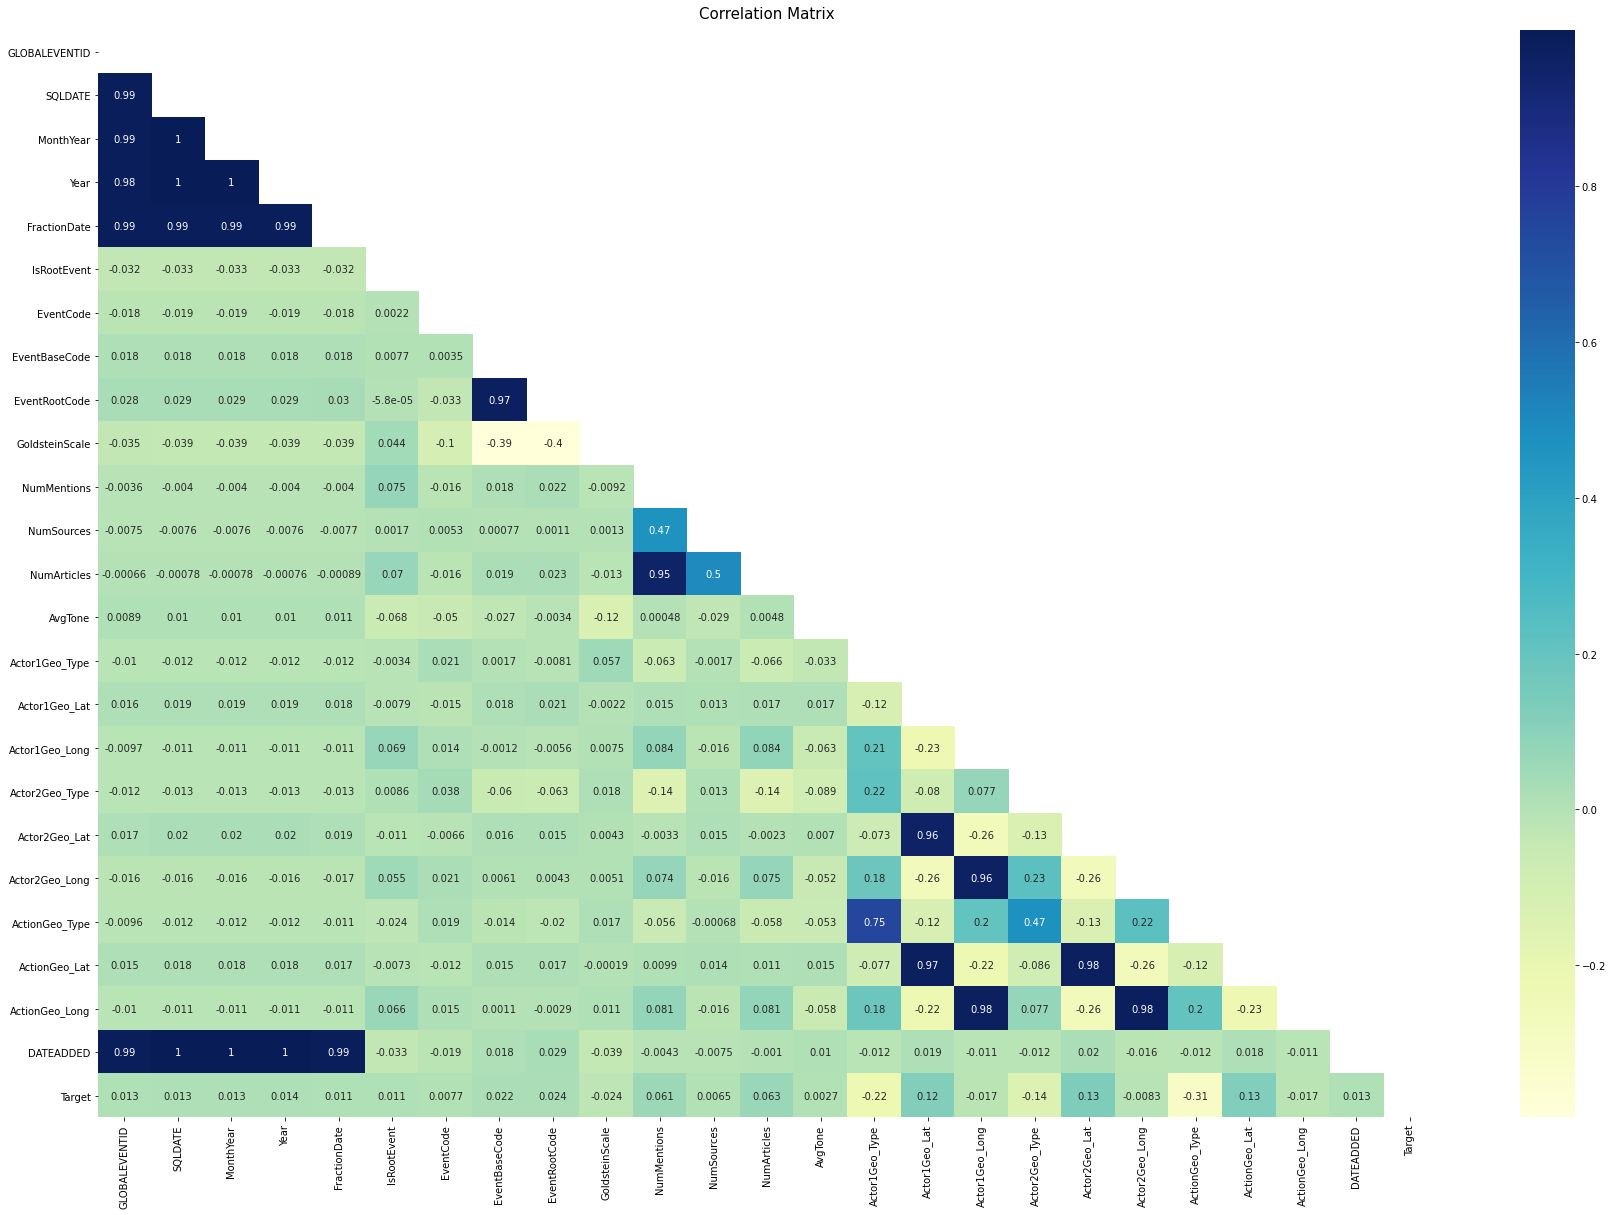

In [52]:
#Correlation between features
cor = df_final_noprotestcode.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool))
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(cor, annot=True, mask=mask,cmap='YlGnBu')
plt.yticks(rotation=0)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':15}, pad=12)

In [53]:
cor_target = abs(cor["Target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features

GLOBALEVENTID     0.012781
SQLDATE           0.013435
MonthYear         0.013437
Year              0.013690
FractionDate      0.011412
IsRootEvent       0.010733
EventCode         0.007696
EventBaseCode     0.022218
EventRootCode     0.024283
GoldsteinScale    0.024243
NumMentions       0.061101
NumSources        0.006523
NumArticles       0.062868
AvgTone           0.002717
Actor1Geo_Type    0.222752
Actor1Geo_Lat     0.119032
Actor1Geo_Long    0.016563
Actor2Geo_Type    0.140628
Actor2Geo_Lat     0.128249
Actor2Geo_Long    0.008269
ActionGeo_Type    0.312688
ActionGeo_Lat     0.125113
ActionGeo_Long    0.017012
DATEADDED         0.013189
Target            1.000000
Name: Target, dtype: float64

In [54]:
#generating df based on significant features
df_relevant=df_final_noprotestcode[['GLOBALEVENTID',
'SQLDATE',
'MonthYear',
'FractionDate',
'IsRootEvent',
'EventCode',
'EventBaseCode',
'EventRootCode',
'GoldsteinScale',
'NumMentions',
'NumSources',
'NumArticles',
'AvgTone',
'Actor1Geo_Type',
'Actor1Geo_Lat',
'Actor1Geo_Long',
'Actor2Geo_Type',
'Actor2Geo_Lat',
'Actor2Geo_Long',
'ActionGeo_Type',
'ActionGeo_Lat',
'ActionGeo_Long',
'DATEADDED','Target']]
df_relevant

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED,Target
659902,410399732,20150218,201502,2015.1315,1,111,111,11,-2.0,3,...,NaN,NaN,4,55.866700,-3.150000,4,55.866700,-3.150000,20150218220000,0
560140,410400350,20150218,201502,2015.1315,1,111,111,11,-2.0,7,...,55.866700,-3.150000,4,55.866700,-3.150000,4,55.866700,-3.150000,20150218220000,0
720038,410400566,20150218,201502,2015.1315,0,112,112,11,-2.0,2,...,47.500200,-111.301000,3,47.500200,-111.301000,3,47.500200,-111.301000,20150218220000,0
674677,410402191,20150218,201502,2015.1315,0,130,130,13,-4.4,10,...,45.166700,15.500000,1,45.166700,15.500000,1,45.166700,15.500000,20150218220000,0
637913,410402316,20150218,201502,2015.1315,1,130,130,13,-4.4,10,...,45.166700,15.500000,1,45.166700,15.500000,1,45.166700,15.500000,20150218220000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,1057497046,20220806,202208,2022.5918,1,130,130,13,-4.4,10,...,45.166667,15.500000,1,45.166667,15.500000,1,45.166667,15.500000,20220806160000,0
4858,1057497872,20220806,202208,2022.5918,1,125,125,12,-5.0,10,...,NaN,NaN,1,54.000000,-4.000000,1,54.000000,-4.000000,20220806161500,1
4860,1057499233,20220806,202208,2022.5918,0,120,120,12,-4.0,10,...,54.000000,-4.000000,1,54.000000,-4.000000,1,54.000000,-4.000000,20220806163000,1
4738,1057500204,20220806,202208,2022.5918,0,110,110,11,-2.0,6,...,NaN,NaN,4,51.500000,-0.116667,4,51.500000,-0.116667,20220806164500,0


In [55]:
df_relevant.info()
#we can see that null values are present in our data. While there are various methods to handle null values, we can see that
#there are columns such as Actor1Geo_Lat present which are geographical columns having lattitude and longitude.
#Geographical data is very important for our analysis and we cannot make any assumptions in this case.
#Therefore we will drop such rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754306 entries, 659902 to 4739
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   GLOBALEVENTID   754306 non-null  int64  
 1   SQLDATE         754306 non-null  int64  
 2   MonthYear       754306 non-null  int64  
 3   FractionDate    754306 non-null  float64
 4   IsRootEvent     754306 non-null  int64  
 5   EventCode       754306 non-null  int64  
 6   EventBaseCode   754306 non-null  int64  
 7   EventRootCode   754306 non-null  int64  
 8   GoldsteinScale  754303 non-null  float64
 9   NumMentions     754306 non-null  int64  
 10  NumSources      754306 non-null  int64  
 11  NumArticles     754306 non-null  int64  
 12  AvgTone         754306 non-null  float64
 13  Actor1Geo_Type  754306 non-null  int64  
 14  Actor1Geo_Lat   671639 non-null  float64
 15  Actor1Geo_Long  671646 non-null  float64
 16  Actor2Geo_Type  754306 non-null  int64  
 17  Actor2G

In [56]:
# drop rows having null values
df_relevant=df_relevant.dropna()

In [57]:
#we can see that no null values are present
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395646 entries, 560140 to 4739
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   GLOBALEVENTID   395646 non-null  int64  
 1   SQLDATE         395646 non-null  int64  
 2   MonthYear       395646 non-null  int64  
 3   FractionDate    395646 non-null  float64
 4   IsRootEvent     395646 non-null  int64  
 5   EventCode       395646 non-null  int64  
 6   EventBaseCode   395646 non-null  int64  
 7   EventRootCode   395646 non-null  int64  
 8   GoldsteinScale  395646 non-null  float64
 9   NumMentions     395646 non-null  int64  
 10  NumSources      395646 non-null  int64  
 11  NumArticles     395646 non-null  int64  
 12  AvgTone         395646 non-null  float64
 13  Actor1Geo_Type  395646 non-null  int64  
 14  Actor1Geo_Lat   395646 non-null  float64
 15  Actor1Geo_Long  395646 non-null  float64
 16  Actor2Geo_Type  395646 non-null  int64  
 17  Actor2G

In [58]:
#Save dataframe to csv. This data file will be uploaded to MongoDB database and will be used to predict future protests.
df_relevant.to_csv(r'Balanced_Data_No_Protest_Code_Significant.csv', index = False)

In [59]:
df_relevant

,GLOBALEVENTID,SQLDATE,MonthYear,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,GoldsteinScale,NumMentions,...,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED,Target
560140,410400350,20150218,201502,2015.1315,1,111,111,11,-2.0,7,...,55.866700,-3.150000,4,55.866700,-3.150000,4,55.866700,-3.150000,20150218220000,0
720038,410400566,20150218,201502,2015.1315,0,112,112,11,-2.0,2,...,47.500200,-111.301000,3,47.500200,-111.301000,3,47.500200,-111.301000,20150218220000,0
674677,410402191,20150218,201502,2015.1315,0,130,130,13,-4.4,10,...,45.166700,15.500000,1,45.166700,15.500000,1,45.166700,15.500000,20150218220000,0
637913,410402316,20150218,201502,2015.1315,1,130,130,13,-4.4,10,...,45.166700,15.500000,1,45.166700,15.500000,1,45.166700,15.500000,20150218220000,0
606144,410403208,20150218,201502,2015.1315,1,1123,112,11,-2.0,2,...,27.000000,30.000000,1,27.000000,30.000000,4,32.767000,22.636700,20150218221500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,1057496940,20220806,202208,2022.5918,1,120,120,12,-4.0,2,...,51.500000,-0.116667,4,51.500000,-0.116667,4,51.500000,-0.116667,20220806160000,0
4866,1057496941,20220806,202208,2022.5918,1,110,110,11,-2.0,2,...,52.250000,21.000000,4,52.250000,21.000000,4,52.250000,21.000000,20220806160000,0
4852,1057497046,20220806,202208,2022.5918,1,130,130,13,-4.4,10,...,45.166667,15.500000,1,45.166667,15.500000,1,45.166667,15.500000,20220806160000,0
4860,1057499233,20220806,202208,2022.5918,0,120,120,12,-4.0,10,...,54.000000,-4.000000,1,54.000000,-4.000000,1,54.000000,-4.000000,20220806163000,1


In [60]:
#count of data in final significant features df based on target. We can see that the data is balanced.
df_relevant['Target'].value_counts()

0    199836
1    195810
Name: Target, dtype: int64